In [2]:
"""
Machine Learning Homework 3
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

'\nMachine Learning Homework 3\nDone by:\nMariana Santana 106992\nPedro Leal 106154\nLEIC-A\n'

#### II. Programming and critical analysis
#### Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various biomedical measurements. To answer question 5), average the performance of the models over 10 separate runs. In each run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10

In [1]:
"""
General imports and variables for all exercises; run this cell before any other
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('parkinsons.csv')

X = data.drop(columns='target')
y = data['target']

#### 5. [2v] Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 neurons each and no activation functions, and another MLP Regressor with 2 hidden layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsan

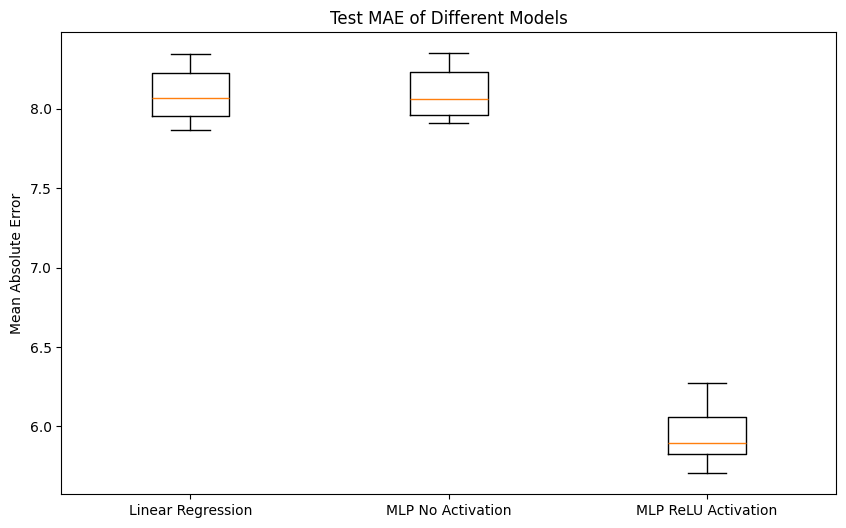

In [4]:
models = {
    "Linear Regression": LinearRegression(),
    "MLP No Activation": MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0),
    "MLP ReLU Activation": MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
}

results = {model_name: [] for model_name in models}

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        results[model_name].append(mae)

plt.figure(figsize=(10, 6))
plt.boxplot([results[model_name] for model_name in models], labels=models.keys())
plt.title('Test MAE of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()

#### 6. [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact and the importance of using activation functions in a MLP. Support your reasoning with the results from the boxplots.

With the analysis of the boxplot above, we discovered that the results for mean absolute error are very similar for the linear regression model and the MLP model without activation. 

This happens because the linear regression model assumes a linear relationship between the input features and the target variable. Similarly, the Multilayer Perceptron (MLP) without activation functions consists in compositions of linear transformations of inputs; these compositions still behave as linear functions so, even though the model's neural network has multiple layers, gives similar results to the linear regression model, as seen in the boxplot.

Additionally, when analysing the boxplot, we assessed that the mean absolute error decreases significantly when using a MLP model with activation (such as ReLU, sigmoid, or tanh). This happens because non-linearity is introduced into the network, enabling it to learn complex patterns and relationships and to approximate any continuous function, resulting in a more comprehensive and accurate learning of the data.

In conclusion, the MLP model with activation functions is more efficient than the previous 2, as confirmed by the lower mean absolute error displayed in the boxplot, revealing the importance of using these functions in the MLP model.


#### 7. [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii) learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values {32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-offs between the combinations.

Fitting 5 folds for each of 27 candidates, totalling 135 fits


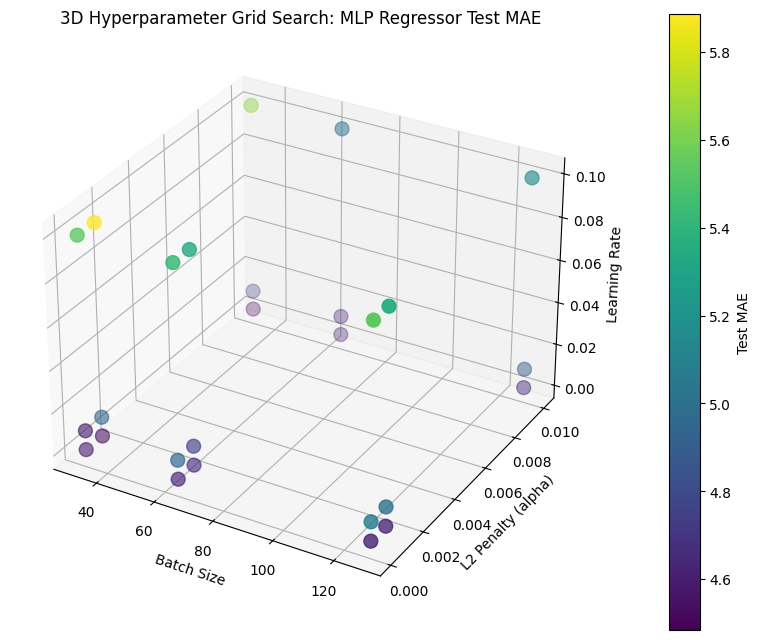

Best Hyperparameters: {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}
Test MAE with Best Hyperparameters: 4.2345


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1], 
    'batch_size': [32, 64, 128]                  
}

grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

results_df['mean_test_mae'] = -results_df['mean_test_score']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

alphas = results_df['param_alpha'].astype(float)
learning_rates = results_df['param_learning_rate_init'].astype(float)
batch_sizes = results_df['param_batch_size'].astype(float)
maes = results_df['mean_test_mae'].astype(float)

scatter = ax.scatter(batch_sizes, alphas,learning_rates, c=maes, cmap='viridis', s=100)

ax.set_xlabel('Batch Size')
ax.set_ylabel('L2 Penalty (alpha)')
ax.set_zlabel('Learning Rate')
ax.set_title('3D Hyperparameter Grid Search: MLP Regressor Test MAE')

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Test MAE')

plt.show()

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with Best Hyperparameters: {test_mae:.4f}")


When analyzing the plot and its scale, we conclude the relation between the alterations in batch sizes, L2 Penalty and learning rate in the MAE. To get a better overview of the results we first decided to analyze each parameter separately:

When it comes to the L2 Penalty, the values influence the amount of regularization applied to the model. This means that for smaller values, the model fits the training data better when compared to larger values. In more extreme cases the smaller alpha values lead to overfitting while the larger lead to underfitting, both decreasing the model's efficiency.

For the learning rate, we know that higher values lead to faster convergences of the model. This can lead to an overshooting of the optimal solution so, it’s better to have smaller learning rates that allow a more stable training even though they increase the training times (that aren't considered in the plot).

On the other hand, batch sizes control the frequency of updates to the model's weights. For smaller batch sizes, these are more frequent which helps with finer adjustments while larger sizes smooth the training processes but decrease the model's ability to capture detailed patterns.

Given this, the best combination of hyperparameters - when the MAE is as low as possible - is 0.01 for L2 Penalty, 32 for batch size and 0.001 for learning rate. This is due to the batch's size and the learning rate being as small as possible and the L2 Penalty being the largest value tested. With these values, the model doesn't overshoot the optimal solution and is able to capture most of the details in the data but still not get overfitted.
